# The Normal Distribution

***


#### G00239124 Martin Cusack

### Introduction

The Normal distibution is one of the most important and frequently-encountered probability distributions in the field of data science. In this notebook, I will explore the nature and parameters of the Normal distribution and also create some visualisations to illustrate some of the key facets of normally-distributed data.

#### The Normal (Gaussian) Distribution

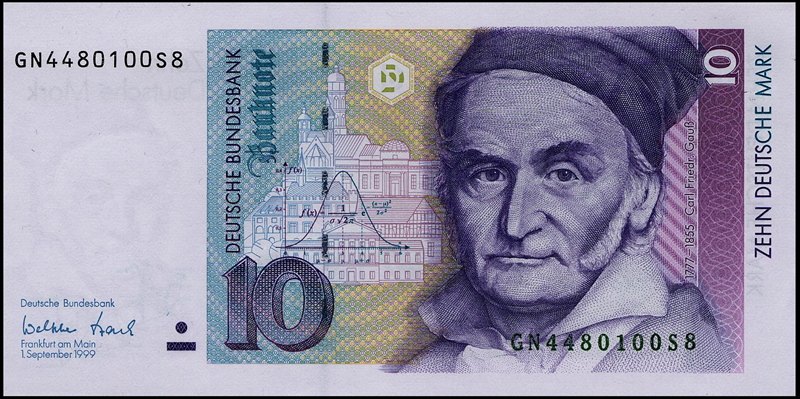

*Above: A 10 Deutsche Mark Note commemorating the ground-breaking achievements of the German mathematician Carl Friedrich Gauss.  A graph of the normal distribution is visible in the centre of the image.*

The Normal Distribution is often referred to as the Gaussian or Laplace-Gauss distribution to honour the work of both the German mathematician Carl Friedrich Gauss and French polymath Pierre-Simon Laplace.  Many phenomena which occur in nature, such as IQ scores, tend to take on the form of the normal distribution.  Since most of the values in a normally-distibuted set of data are grouped around the centre or median line, it is also often referred to as a "bell curve" because of the resulting distinctive symmetrical shape.

The **mean** (μ) and **standard deviation** (σ) are what defines the shape of a normal distribution. As a general rule, when we visualise normally-distributed data we can see that approximately 68% of data will be grouped within one standard deviation of the mean.

#### Probability density function

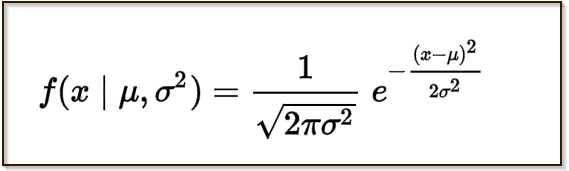

**Probability density function** (or PDF) describes the probability of a random variable falling within a particular range of values.  The PDF of the normal distribution is represented by the mathematical function in the above image, in which μ represents the mean and σ represents the standard deviation. The square of the standard deviation is called the "variance". As we can see from the function above, once we have the mean and standard deviation we can calculate the probability of any given value for x using this function.

#### Visualising the Normal Distribution

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

Using the numpy and matplotlib packages, we can create arrays of normally distributed numbers, as well as a huge variety of visualisations of the normal distribution.

Below, we can see how to create a normally distributed numpy array using numpy's random.normal function.

In [32]:
# generate a random normal distribution 
np.random.normal(size = (4,4))

array([[ 1.97338685,  1.67843951,  0.75779683,  0.02436965],
       [ 0.50470455,  1.48995928, -0.3027448 ,  0.25542736],
       [ 0.09536352,  0.86470485, -1.13085631, -0.1129538 ],
       [ 0.14629321, -1.27513218,  0.68201064, -0.44522476]])

#### Histogram

A simple way of visualising a randomly-generated normal array, such as the above, is to use Matplotlib's histogram function in conjunction with scipy.stats. We can also use Matplotlib to illustrate the line of the curve.

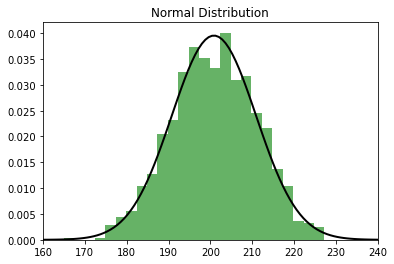

In [3]:
# Generate some random data
data = np.random.normal(200, 10, 1000) # mean, std, size
  
# Fit data to normal distribution using scipy's stats.norm feature
mu, std = norm.fit(data) 
  
# Plot histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')
  
# Plot the PDF
xmin, xmax = plt.xlim(160, 240) # use xlim to define limits of x axis
x = np.linspace(xmin, xmax, 100) # use linspace to create sequence of evenly spaced values.
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth= 2) # show line of curve
title = "Normal Distribution".format(mu, std)
plt.title(title)
  
plt.show()

#### Histogram - Different means
The **mean** always describes where the centre of the normal distribution is. We can visualise this by plotting three separate distributions with different means, but the same standard deviation.

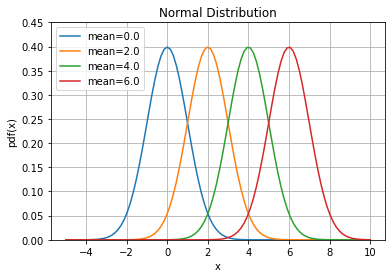

In [4]:
# create histogram
fig, ax = plt.subplots()
x = np.linspace(-5,10,100) # use linspace to create sequence of evenly spaced values.
means = [0, 2, 4, 6]
for mean in means:
    ax.plot(x, norm.pdf(x,loc=mean), label='mean=%.1f' % mean) # display separate labels for the 4 means
    
ax.set_xlabel('x') # create labels
ax.set_ylabel('pdf(x)') # create labels
ax.set_title('Normal Distribution')
ax.legend(loc='upper left') # display legend in upper left
ax.set_ylim(0,0.45) # define limits of y axis
ax.grid(True) # display grid
plt.show()

#### Histogram - Different standard deviations
The **standard deviation** describes the spread of the normal distribution. We can visualise this by plotting three separate distributions with different standard deviations, but the same mean.

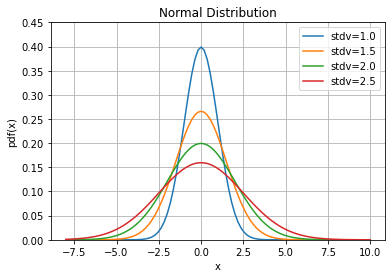

In [5]:
# create histogram
fig, ax = plt.subplots()
x = np.linspace(-8,10,100)# use linspace to create sequence of evenly spaced values.
stdvs = [1, 1.5, 2, 2.5]
for s in stdvs:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s) # display separate labels for the 4 standard deviations
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='upper right')  # display legend in upper right
ax.set_ylim(0,0.45) # define limits of y axis
ax.grid(True) # display grid
plt.show()

### A Real World Example of a Normal distribution

In the following section I will look at an example of some normally-distributed data taken from a real-world data set of world population rates.  To do this I imported a CSV file into a Pandas data frame which contains information on population growth since 1970, with columns for Area, Population Density, Growth Rate etc.  To illustrate an example of normally-distributed data, I will focus on the data in the **Growth Rate** column.

In [4]:
# import CSV file into pandas dataframe
df = pd.read_csv (r"C:\Users\cusac\OneDrive\Desktop\world_population.csv")

In [5]:
# print first 7 rows to get a sense of the data
df.head(7)

,Rank,Country,Continent,2020 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afghanistan,Asia,38972230,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Europe,2866849,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Africa,43451666,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,American Samoa,Oceania,46189,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,Andorra,Europe,77700,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
5,42,Angola,Africa,33428485,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45
6,224,Anguilla,North America,15585,13172,11047,8316,6560,6283,91,174.2527,1.0066,0.00


In [37]:
# focusing on the data in the Growth Rate column: find mean growth rate
mean = df['Growth Rate'].mean()
print(mean)

1.0095773504273502


In [38]:
# find standard deviation of Growth Rate
std = df['Growth Rate'].std()
print(std)

0.01338498453399876


In [8]:
# find min and max of Growth Rate: min
df['Growth Rate'].min()

0.912

In [9]:
# max
df['Growth Rate'].max()

1.0691

Text(0, 0.5, 'Frequency')

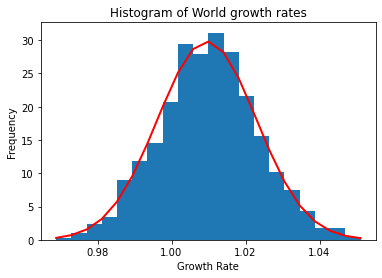

In [40]:
# create histogram of growth rate (world population), incorporating probability density function
s = np.random.normal(mean, std, 1000)
count, bins, ignored = plt.hist(s, 20, density=True)   
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *   
               np.exp( - (bins - mean)**2 / (2 * std**2) ),
         linewidth=2, color='r')
plt.title("Histogram of World growth rates")
plt.xlabel("Growth Rate")
plt.ylabel("Frequency")

As we can see from the above histogram the result is a good example of a normal distribution, with most values clustered around the mean of 1.009. There are two outliers: the country with the lowest growth rate (Ukraine: 0.912) and the country with the highest growth rate (Moldova: 1.06)

### Conclusion

As mentioned above, the Normal Distribution is one which is encountered on a regular basis in the field of data science. When we visualise normally-distributed data, it's distinctive bell-curve shape reveals that data near the mean are more frequent in occurrence than data far from the mean. The mean and the standard deviation are the two parameters which define and give shape to any iteration of the Normal distribution.

## References

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
    
https://www.w3schools.com/python/numpy/numpy_random_normal.asp

https://www.w3schools.com/statistics/statistics_normal_distribution.php#:~:text=The%20normal%20distribution%20is%20described,median%20and%20mean%20are%20equal

https://en.wikipedia.org/wiki/Normal_distribution

https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/?ref=rp

https://stackoverflow.com/questions/10138085/how-to-plot-normal-distribution

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

https://matplotlib.org/

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

https://scipy.org/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html



## End
***